# Task 2: Multivariate Gaussian (25 points)

- A. (10 pts) Write the function plot2dcov which plots the 2d contour given three core parameters: mean,
covariance, and the iso-contour value $k$. You may add any other parameter such as color, number of points,
etc.
- B. (5 pts) Write the equation of sample mean and sample covariance of a set of points $\{x_i\}$, in vector form as
was shown during the lecture. You can provide your solution by using Markdown, latex, by hand, etc.
- C. (10 pts) Draw random samples from a multivariate normal distribution. You can use the python function that draws samples univariate normal distribution $N(0, 1)$. In particular, draw and plot 200 samples
$\mathcal{N}\left(\left[\begin{array}{l}
2 \\
2
\end{array}\right],\left[\begin{array}{cc}
1 & 1.3 \\
1.3 & 3
\end{array}\right]\right)
$; also plot their corresponding 1-sigma iso-contour. Then calculate the samplemean and covariance in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try different number of samples. Comment on the results.



## A. (10 pts) 
Write the function plot2dcov which plots the 2d contour given three core parameters: mean,
covariance, and the iso-contour value $k$. You may add any other parameter such as color, number of points,
etc.

In [142]:
import numpy as np

from scipy.stats import norm
from scipy.linalg import cholesky


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [200]:
def plot2dcov(mean, cov, color, label, k=1, n_points=60):

    Cholesky = cholesky(cov, lower=True)

    angles = np.linspace(0, 2 * np.pi, n_points)
    x_old = k * np.cos(angles)
    y_old = k * np.sin(angles)

    coords = np.stack((x_old, y_old), 1)
    contour = coords @ Cholesky.T + mean.reshape(1, 2) 

    plt.plot(contour[:, 0], contour[:, 1], color=color, label=label)
    plt.xlabel('x_1', size=14)
    plt.ylabel('x_2', size=14)

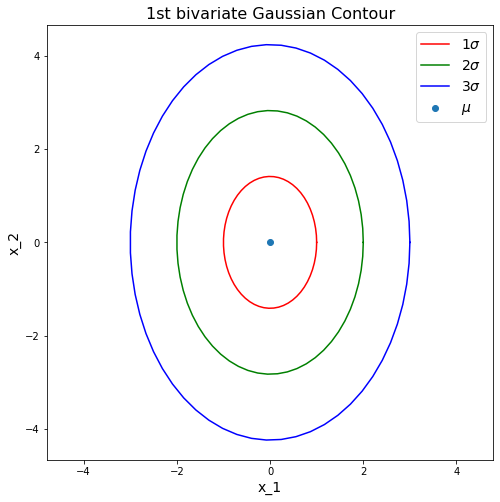

In [201]:
mean_1 = np.array([0, 0])
cov_1 = np.array([[1, 0], [0, 2]])

plt.figure(figsize=(8,8))

plt.title(r'1st bivariate Gaussian Contour', size=16)
plot2dcov(mean_1, cov_1, color='r', label=f'{1}$\sigma$')
plot2dcov(mean_1, cov_1, k=2, color='g', label=f'{2}$\sigma$')
plot2dcov(mean_1, cov_1, k=3, color='b', label=f'{3}$\sigma$')
plt.scatter(mean_1[0], mean_1[1], label='$\mu$')
plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

Here $X_1$ and $X_2$ are uncorrelated since $\sigma_{12} = \sigma_{21} = 0$. 

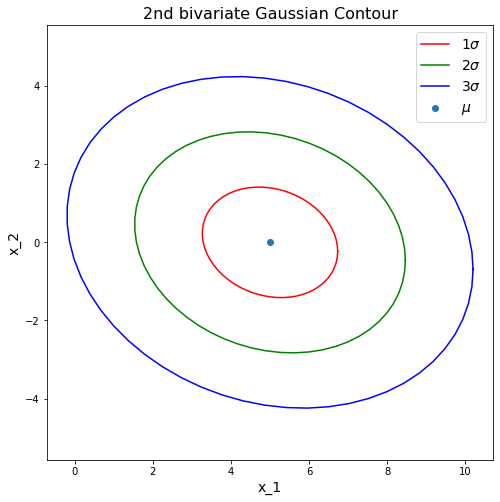

In [202]:
mean_2 = np.array([5, 0])
cov_2 = np.array([[3, -0.4], [-0.4, 2]])


plt.figure(figsize=(8,8))

plt.title(r'2nd bivariate Gaussian Contour', size=16)
plot2dcov(mean_2, cov_2, color='r', label=f'{1}$\sigma$')
plot2dcov(mean_2, cov_2, k=2, color='g', label=f'{2}$\sigma$')
plot2dcov(mean_2, cov_2, k=3, color='b', label=f'{3}$\sigma$')
plt.scatter(mean_2[0], mean_2[1], label='$\mu$')
plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()

Small negative correlation between $X_1$ and $X_2$: $$\sigma_{12} = \sigma_{21} = -0.4$$ 

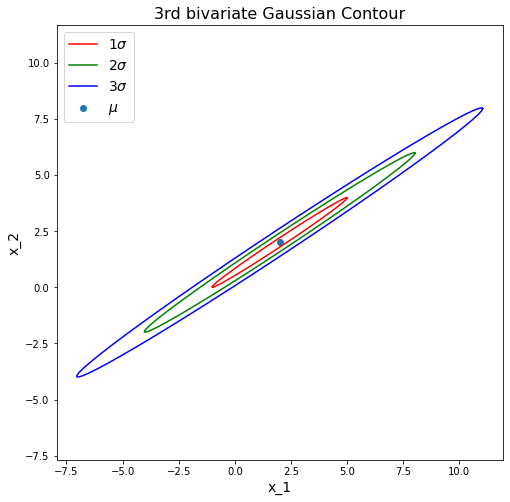

In [203]:
mean_3 = np.array([2, 2])
cov_3 = np.array([[9.1, 6], [6, 4]])

plt.figure(figsize=(8,8))

plt.title(r'3rd bivariate Gaussian Contour', size=16)
plot2dcov(mean_3, cov_3, color='r', label=f'{1}$\sigma$')
plot2dcov(mean_3, cov_3, k=2, color='g', label=f'{2}$\sigma$')
plot2dcov(mean_3, cov_3, k=3, color='b', label=f'{3}$\sigma$')
plt.scatter(mean_3[0], mean_3[1], label='$\mu$')
plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()


Strong positive correlation between $X_1$ and $X_2$: $$\sigma_{12} = \sigma_{21} = 6$$ 

## B. (5 pts) 
Write the equation of sample mean and sample covariance of a set of points $\{x_i\}$, in vector form as
was shown during the lecture. You can provide your solution by using Markdown, latex, by hand, etc.

Let's say we have r.v. $x_i$ ~ $p(x)$ and $x_i$ is i.i.d.


Sample mean

$$
\bar{x}=\frac{1}{N} \sum_{i=1}^{N} x_{i}
$$
Sample covariance (unbiased estimate)
$$
\bar{\Sigma}_{x}=\frac{1}{N-1} \sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)\left(x_{i}-\bar{x}\right)^{\top}
$$

## C. (10 pts) 
Draw random samples from a multivariate normal distribution. You can use the python function that draws samples univariate normal distribution $N(0, 1)$. In particular, draw and plot 200 samples
$\mathcal{N}\left(\left[\begin{array}{l}
2 \\
2
\end{array}\right],\left[\begin{array}{cc}
1 & 1.3 \\
1.3 & 3
\end{array}\right]\right)
$; also plot their corresponding 1-sigma iso-contour. 



In [217]:
from scipy.stats import multivariate_normal


mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])

bivariate_norm = multivariate_normal(mean=mean, cov=cov)

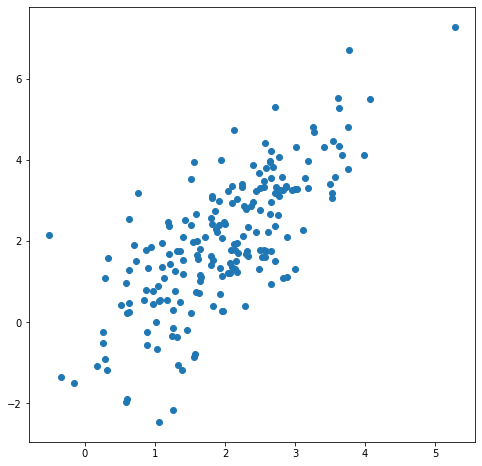

In [218]:
sample = bivariate_norm.rvs(size=200, random_state=42)

plt.figure(figsize=(8,8))

plt.scatter(sample[:, 0], sample[:, 1])
plt.show()

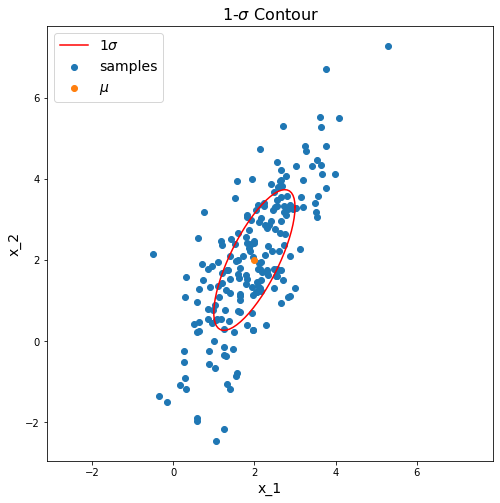

In [219]:
plt.figure(figsize=(8,8))

plt.title(r'1-$\sigma$ Contour', size=16)
plot2dcov(mean, cov, color='r', label=f'{1}$\sigma$')
plt.scatter(sample[:, 0], sample[:, 1], label='samples')
plt.scatter(mean[0], mean[1], label='$\mu$')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()


Then calculate the sample *mean* and *covariance* in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try different number of samples. Comment on the results.

In [220]:
sample_mean = sample.sum(axis=0) / len(sample)
print(f'Sample Mean: {sample_mean}')

sample_cov = ((sample - sample_mean).T @ (sample - sample_mean))/ (len(sample) - 1)
print(f'Sample Covariance: \n{sample_cov}')

Sample Mean: [1.97379703 1.99941458]
Sample Covariance: 
[[0.89769311 1.17243906]
 [1.17243906 2.77676566]]


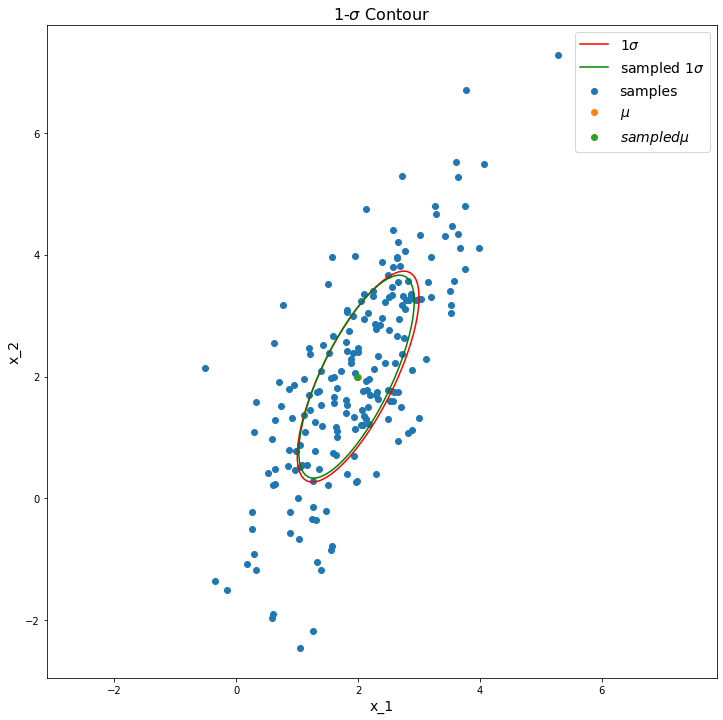

In [221]:
plt.figure(figsize=(12,12))

plt.title(r'1-$\sigma$ Contour', size=16)
plot2dcov(mean, cov, color='r', label=f'{1}$\sigma$')
plot2dcov(sample_mean, sample_cov, color='g', label=f'sampled {1}$\sigma$')
plt.scatter(sample[:, 0], sample[:, 1], label='samples')
plt.scatter(mean[0], mean[1], label='$\mu$')
plt.scatter(sample_mean[0], sample_mean[1], label='$sampled \mu$')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()


Let's increase amount of samples

Sample Mean: [1.97809428 2.00312787]
Sample Covariance: 
[[0.92635511 1.19108447]
 [1.19108447 2.83184519]]


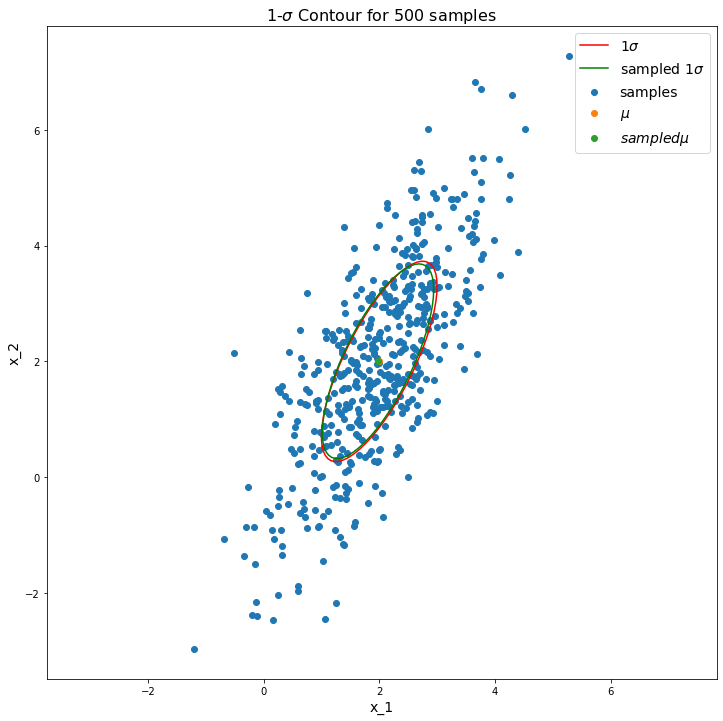

Sample Mean: [1.94136267 1.9582973 ]
Sample Covariance: 
[[0.95751591 1.18880402]
 [1.18880402 2.77916132]]


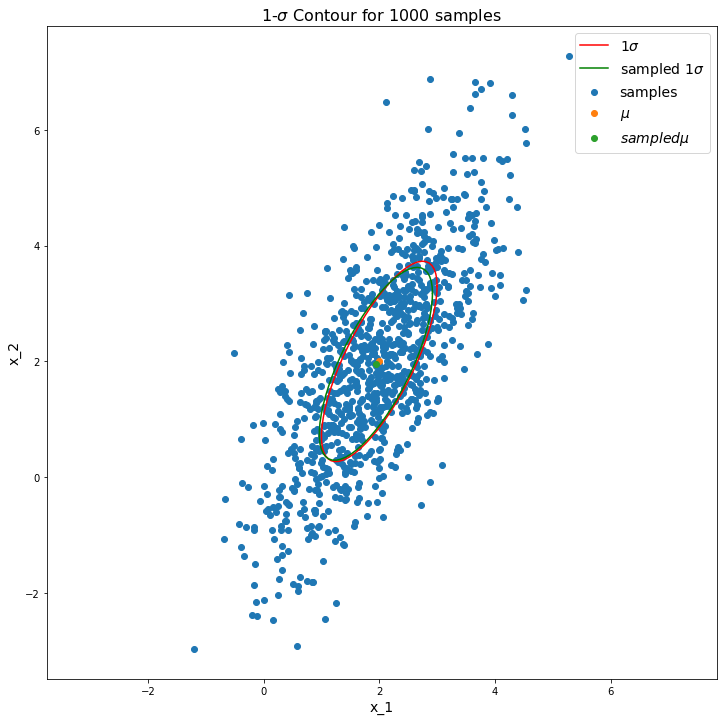

Sample Mean: [1.9757963  1.98813255]
Sample Covariance: 
[[1.00348103 1.26955166]
 [1.26955166 2.89597708]]


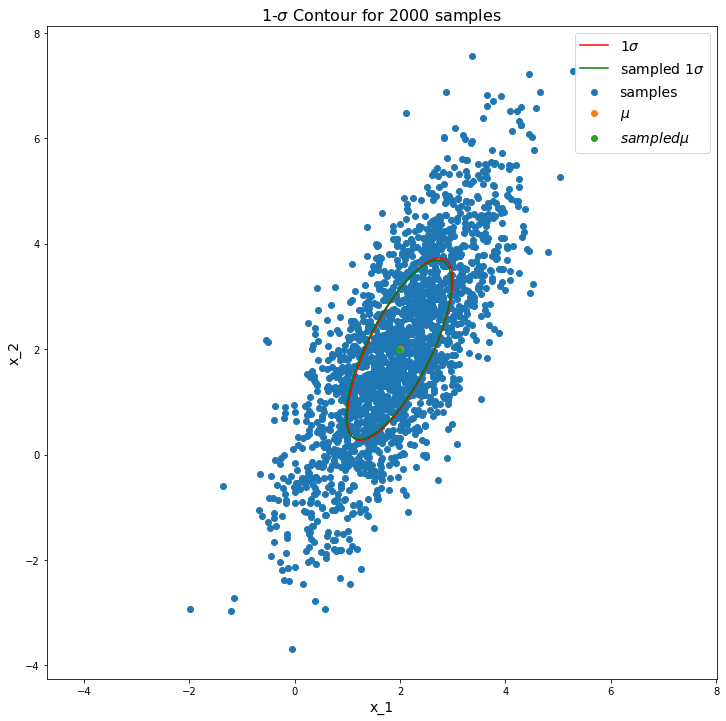

Sample Mean: [2.00363992 1.99763053]
Sample Covariance: 
[[1.00417781 1.29756408]
 [1.29756408 3.01936282]]


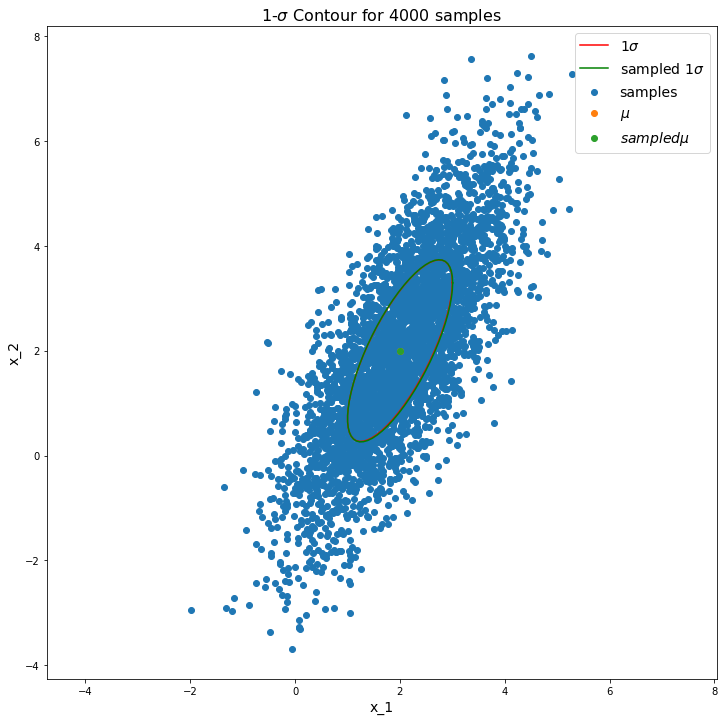

Sample Mean: [2.00857091 2.01023857]
Sample Covariance: 
[[0.99987227 1.30329949]
 [1.30329949 3.01793413]]


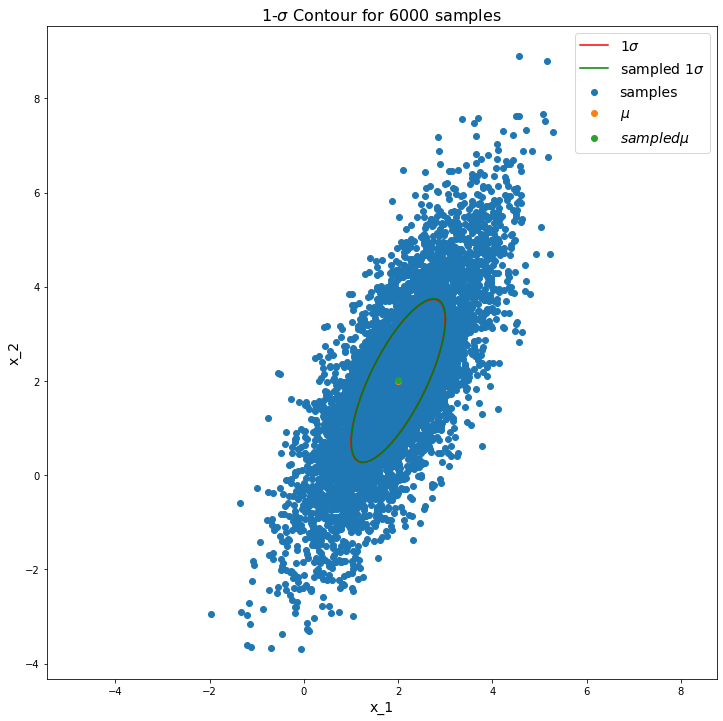

In [215]:
sample_size = [500, 1000, 2000, 4000, 6000]

for size in sample_size:
    sample = bivariate_norm.rvs(size=size, random_state=42)

    sample_mean = sample.sum(axis=0) / len(sample)
    print(f'Sample Mean: {sample_mean}')

    sample_cov = ((sample - sample_mean).T @ (sample - sample_mean))/ (len(sample) - 1)
    print(f'Sample Covariance: \n{sample_cov}')

    plt.figure(figsize=(12,12))

    plt.title(f'1-$\sigma$ Contour for {size} samples', size=16)
    plot2dcov(mean, cov, color='r', label=f'{1}$\sigma$')
    plot2dcov(sample_mean, sample_cov, color='g', label=f'sampled {1}$\sigma$')
    plt.scatter(sample[:, 0], sample[:, 1], label='samples')
    plt.scatter(mean[0], mean[1], label='$\mu$')
    plt.scatter(sample_mean[0], sample_mean[1], label='$sampled \mu$')

    plt.axes().set_aspect('equal', 'datalim')
    plt.legend(prop={'size': 14})

    plt.show()


And let's decrease amount of samples

Sample Mean: [2.07908967 2.20682256]
Sample Covariance: 
[[0.8349497  0.93483044]
 [0.93483044 2.19330791]]


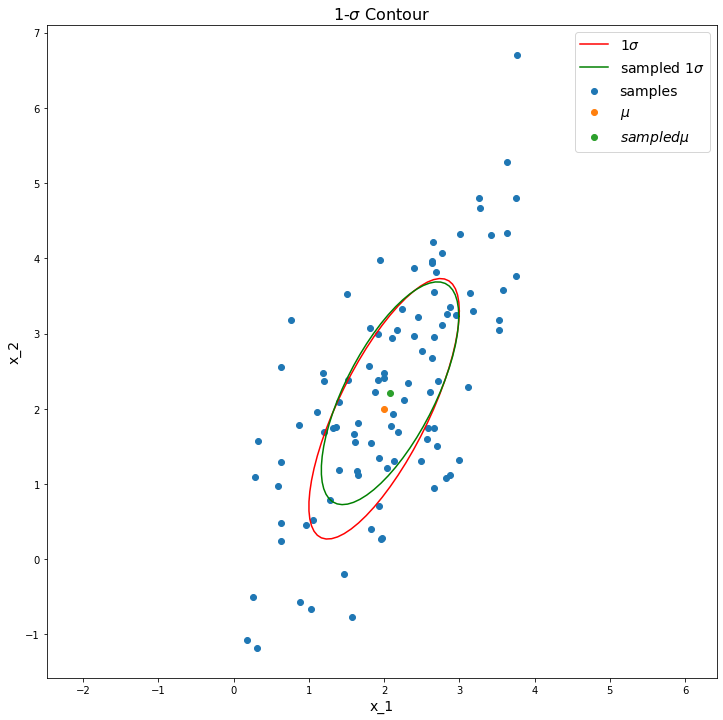

In [216]:
sample = bivariate_norm.rvs(size=100, random_state=42)

sample_mean = sample.sum(axis=0) / len(sample)
print(f'Sample Mean: {sample_mean}')

sample_cov = ((sample - sample_mean).T @ (sample - sample_mean))/ (len(sample) - 1)
print(f'Sample Covariance: \n{sample_cov}')

plt.figure(figsize=(12,12))

plt.title(r'1-$\sigma$ Contour', size=16)
plot2dcov(mean, cov, color='r', label=f'{1}$\sigma$')
plot2dcov(sample_mean, sample_cov, color='g', label=f'sampled {1}$\sigma$')
plt.scatter(sample[:, 0], sample[:, 1], label='samples')
plt.scatter(mean[0], mean[1], label='$\mu$')
plt.scatter(sample_mean[0], sample_mean[1], label='$sampled \mu$')

plt.axes().set_aspect('equal', 'datalim')
plt.legend(prop={'size': 14})

plt.show()


An increase in the number of observations led to a more accurate sample mean and sample variance calculations. But already with 500 observations sample means and variances became very close to the ground truth. Further increasing of observations was more helpful for correcting the correlation elements of covariance matrix.For 6000 samples $1\sigma$ contours coincide.


Obviously, decreasing in the number of samples led to a less accurate calculations for sample mean and covariance matrix. Hence $1\sigma$ contours are quite different    